<a href="https://colab.research.google.com/github/Gavin-Moss/Python-for-Math/blob/main/Steps2Convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
# A function that takes in the coefficients of a polynomial and an x value, then returns the polynomial's value at that x value
def poly_point(poly_coeffs, x):
  degree = len(poly_coeffs) - 1
  result = 0
  for i in range(degree + 1):
    result += poly_coeffs[i] * x ** (degree - i)
  return result

# A function that takes in the coefficients of a polynomial and an x value, then returns the polynomial's derivative at that x value
def poly_dev(poly_coeffs, x):
  new_coeffs = np.arange(len(poly_coeffs))[:0:-1] * np.array(poly_coeffs)[:-1]
  return poly_point(new_coeffs, x)

In [3]:
'''
A function that takes in the coefficients of a polynomial, an x value, and a number of steps, 
then applies Newton's Method for the amount of steps or until terminal behaivor is reached (to n digits of precision).
'''
def poly_newton(poly_coeffs, x, n=8, steps=100):
  x0 = x
  x_list = []
  for i in range(steps):
    x0 -= poly_point(poly_coeffs, x0) / poly_dev(poly_coeffs, x0)  # Newton's Method: x1 = x0 - f(x0) / f'(x0)
    if np.round(x0, n) in x_list:  # If x0 ever becomes what it was before (to 15 digits of precision), then it will begin repeating itself and more calculations are not needed
      return i
    x_list.append(np.round(x0, n))  # Adds each x0 to a list
  return i  # If all of the steps are completed without a repeat x0 being found, returns last x0

In [4]:
def complex_NM(poly_coeffs, xy_min, xy_max, x_res, y_res=1, steps=100):
  # If the vertical resolution is not specified, this gives it a resolution proportional to the horizontal resolution
  if y_res:
    y_res = int(x_res * (xy_max[1] - xy_min[1]) / (xy_max[0] - xy_min[0]))
  print(x_res, y_res)  # Prints what the resolution of the image will be

  # Initializes all real and imaginary parts of x that will be used, according to the resolution and specifed region
  x_reals = np.linspace(xy_min[0], xy_max[0], x_res)
  x_imags = np.linspace(xy_min[1], xy_max[1], y_res)

  # Initializes an array that will contain all complex values of x
  x_values = np.zeros([y_res, x_res], dtype='complex128')

  # Fills in the array with all real and imaginary parts of x
  for j in range(x_res):
    x_values[:, j].real = x_reals[j]
  for i in range(y_res):
    x_values[i, :].imag = x_imags[i]

  # Initializes the image array
  img_arr = np.zeros([y_res, x_res, 3], dtype='uint8')

  # Calculates several variables that will be used later
  roots = np.roots(poly_coeffs)
  print(roots)  # Prints the complex roots of the polynomial, which may be useful when looking at the final image
  real_min = min(roots.real)
  real_max = max(roots.real)
  imag_min = min(roots.imag)
  imag_max = max(roots.imag)
  
  real_mid = (real_min + real_max) / 2
  imag_mid = (imag_min + imag_max) / 2

  e = 2.71828
  p = (real_min - real_max) / 2.7726
  q = (imag_min - imag_max) / 2.7726
  # See text box below for significance of these variables

  # Creates the image
  for i in range(y_res):
    if i % 10 == 0:
      print(i, end='  ')
      # Prints the number of completed rows every 10 completed rows
    for j in range(x_res):
      num_steps = poly_newton(poly_coeffs, x_values[i, j], steps)  # Performs Newton's Method on every pixel
      img_arr[i, j] = [int((255/steps) * num_steps)] * 3  # Assigns the pixel a color according to the result of Newton's Method
      # See text box below for explanation

  # Displays image
  img = Image.fromarray(img_arr)
  display(img)

500 500
[-1.55299029+0.j          1.45422959+1.07056853j  1.45422959-1.07056853j
  0.32226556+1.13066849j  0.32226556-1.13066849j]
0  10  20  30  40  50  60  70  80  90  100  110  120  130  140  150  160  170  180  190  200  210  220  230  240  250  260  270  280  290  300  310  320  330  340  350  360  370  380  390  400  410  420  430  440  450  460  470  480  490  

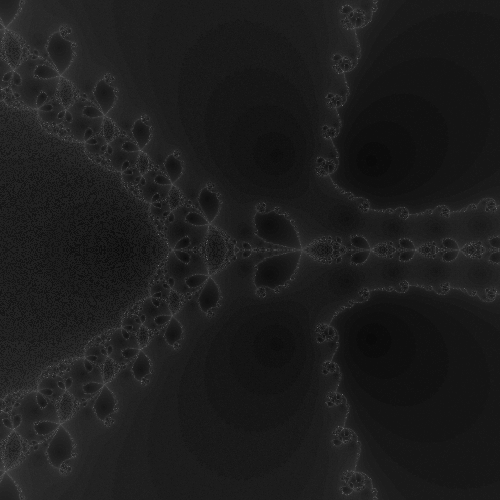

In [5]:
coeffs = [1, -2, 1, 4, -5, 7]
complex_NM(coeffs, [-3, -3], [3, 3], 500, steps=100)

OKAY LETS DO THIS :)

The code above is jesse's work, but it's in PIL, and I need to make this image in matplotlib using hexbin. I believe the white lines take lots of iterations to reach the root, and the black takes a few.

It'll get messy, but the first thing im gonna do is copy past the code above, so i can modify things without messing anything up

**5 PM:** i think i can use the same x values as jesse's code, but i dont know what to do for the y-values. I need to find the # of iterations needed to reach the root at all x values. I guess once i get that number (of iterations) i should put it into a np array? or has that already been done???

In [43]:
#~~~~~~~~~~~~~~~~~~~~~~~~ ONLY EDIT THIS ONE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def MATPLOTLIBcomplex_NM(poly_coeffs, xy_min, xy_max, x_res, y_res=1, steps=100):
  # If the vertical resolution is not specified, this gives it a resolution proportional to the horizontal resolution
  if y_res:
    y_res = int(x_res * (xy_max[1] - xy_min[1]) / (xy_max[0] - xy_min[0]))
  print(x_res, y_res)  # Prints what the resolution of the image will be

  # Initializes all real and imaginary parts of x that will be used, according to the resolution and specifed region
  x_reals = np.linspace(xy_min[0], xy_max[0], x_res)
  x_imags = np.linspace(xy_min[1], xy_max[1], y_res)

  # Initializes an array that will contain all complex values of x
  x_values = np.zeros([y_res, x_res], dtype='complex128')

  # Fills in the array with all real and imaginary parts of x
  for j in range(x_res):
    x_values[:, j].real = x_reals[j]
  for i in range(y_res):
    x_values[i, :].imag = x_imags[i]
#~~~~~~~~~~~~~ I THINK FOR NOW, I'M NOT CHANGING ANYTHING ABOVE THIS LINE~~~~~~~~~~~~~~~~~~~~~~~~~~

  # Initializes the image array
  img_arr = np.zeros([y_res, x_res, 3], dtype='uint8')

  # Calculates several variables that will be used later
  roots = np.roots(poly_coeffs)
  print(roots)  # Prints the complex roots of the polynomial, which may be useful when looking at the final image
  real_min = min(roots.real)
  real_max = max(roots.real)
  imag_min = min(roots.imag)
  imag_max = max(roots.imag)
  
  real_mid = (real_min + real_max) / 2
  imag_mid = (imag_min + imag_max) / 2

  e = 2.71828
  p = (real_min - real_max) / 2.7726
  q = (imag_min - imag_max) / 2.7726
  # See text box below for significance of these variables

  # Creates the image
  for i in range(y_res):
    if i % 10 == 0:
      print(i, end='  ')
      # Prints the number of completed rows every 10 completed rows
    for j in range(x_res):
      num_steps = poly_newton(poly_coeffs, x_values[i, j], steps)  # Finds num of steps for each coordinate ???
      img_arr[i, j] = [int((255/steps) * num_steps)] * 3  # Assigns the pixel a color according to the result of Newton's Method
  # At the very end, our image will be displayed with hexbin
  #im using google to understand hexbin's inputs
  plt.hexbin(x_values, img_arr) #first inputs are x and y, both arrays
  

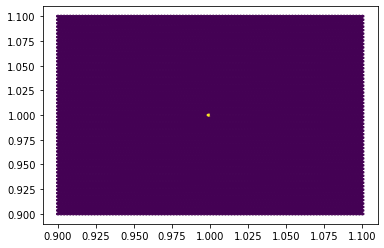

In [42]:
plt.hexbin([1],[1])

In [ ]:
coeffs = [1, -2, 1, 4, -5, 7]
MATPLOTLIBcomplex_NM(coeffs, [-3, -3], [3, 3], 200, steps=100)

In [56]:
#HERE IS JSUT A FUNCTION FOR ME TO TEST STUFF BECAUSE IM SO LOST AND WANT TO DIE
def test(poly_coeffs, xy_min, xy_max, x_res, y_res=1, steps=100):

  x_axis = np.linspace(xy_min[0],xy_max[0],x_res)

  ArrayOfNumSteps = np.zeros(x_res) #an array of zeros, of length whatever the resolution of the image will be
  for i in range(len(ArrayOfNumSteps)):
    ArrayOfNumSteps[i] = poly_newton(poly_coeffs,x_axis[i]) 
    #IN THIS MODIFIED CODE, THIS JOURNAL - POLYNEWTON IS RETURNING THE NUMBER OF STEPS
  print(ArrayOfNumSteps)
 #OKAYYYY I HAVE A PROBLEM THAT I CAN WORK TOWARDS. I DONT HAVE A WAY TO ACCESS EVERY SINGLE X COORDINATE ??
 #I THINK???
 # SO LETS TRY TO GET AN ARRAY OF THE XVALUES?
 # i think i did it? its on the line where x_axis is declared
  plt.hexbin(x_axis,ArrayOfNumSteps)
 #well after plotting what i have, i think this plot shows how many iterations it takes, for each x value
 #however, there is clearly a ton of blank space. Do i need a 2d array to reach every value? i dont know wtf
 #is happening, im gonna think for a bit

[ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  3.  3.  3.  3.  2.  3.  3.  3.  3.  3.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.  8.  8.
  8.  9.  9.  9. 10. 11. 11. 12. 13. 15. 18. 54. 71. 17. 25. 31. 44. 41.
 13. 49. 35. 25. 26. 12. 10. 33. 30. 11.  7. 11. 22. 18. 16. 11.  9. 40.
 10. 11.  8. 68. 14. 12. 16. 15. 10.  9.  8.  7.  7.  7.  6.  6.  6.  6.
  6.  6.  6.  6.  7.  7.  7.  8.  8.  9. 11. 14. 29. 38. 32. 10. 42. 15.
 11.  8.  8. 11. 21. 10. 18. 28. 18. 24. 45. 23. 15

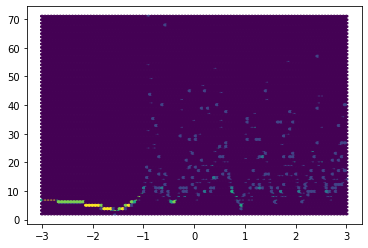

In [57]:
coeffs = [1, -2, 1, 4, -5, 7]
test(coeffs, [-3, -3], [3, 3], 500, steps=100)